# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rina Rismawati]
- **Email:** [mc367d5x0835@student.devacademy.com]
- **ID Dicoding:** [rinarsm]

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penyewaan sepeda dari tahun 2011 hingga 2012?
2. Bagaimana performa penyewaan sepeda perbulan selama tahun 2011 hingga 2012?
3. Bagaimana performa penyewaan sepeda perjam selama tahun 2011 hingga 2012?
4. Pada musim apa penyewaan sepeda banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [45]:
# Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data peminjaman sepeda per hari, mencakup informasi seperti tanggal (dteday), musim (season), cuaca (weathersit), suhu (temp), kelembaban (hum), kecepatan angin (windspeed), dan jumlah total peminjaman (cnt).
- Dataset hour.csv berisi data peminjaman sepeda per jam, memiliki kolom yang mirip dengan day.csv, tetapi dengan tambahan kolom jam (hr) untuk melihat tren peminjaman secara lebih detail.


### Assessing Data

In [48]:
#Menilai data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
# Memeriksa missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [51]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [52]:
# Menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [54]:
# Memeriksa missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [55]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua dataset tidak memiliki duplikasi data
- Kedua dataset tidak memiliki missing value

### Cleaning Data

In [56]:
# Menghapus kolom yang tidak digunakan

drop_columns = ['instant','holiday', 'weekday', 'workingday', 'weathersit',
                'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

day_df = day_df.drop(columns=drop_columns)
hour_df = hour_df.drop(columns=drop_columns)

print(day_df.head())
print(hour_df.head())

       dteday  season  yr  mnth   cnt
0  2011-01-01       1   0     1   985
1  2011-01-02       1   0     1   801
2  2011-01-03       1   0     1  1349
3  2011-01-04       1   0     1  1562
4  2011-01-05       1   0     1  1600
       dteday  season  yr  mnth  hr  cnt
0  2011-01-01       1   0     1   0   16
1  2011-01-01       1   0     1   1   40
2  2011-01-01       1   0     1   2   32
3  2011-01-01       1   0     1   3   13
4  2011-01-01       1   0     1   4    1


In [57]:
# Mengubah dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [58]:
# Mengubah data int menjadi category
columns_day = ['season', 'yr', 'mnth']
columns_hour = ['season', 'yr', 'mnth', 'hr']

for column in columns_day:
    day_df[column] = day_df[column].astype("category")

for column in columns_hour:
    hour_df[column] = hour_df[column].astype("category")

In [59]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  731 non-null    datetime64[ns]
 1   season  731 non-null    category      
 2   yr      731 non-null    category      
 3   mnth    731 non-null    category      
 4   cnt     731 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(1)
memory usage: 14.4 KB
None


In [60]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  17379 non-null  datetime64[ns]
 1   season  17379 non-null  category      
 2   yr      17379 non-null  category      
 3   mnth    17379 non-null  category      
 4   hr      17379 non-null  category      
 5   cnt     17379 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(1)
memory usage: 341.0 KB
None


In [61]:
# Mengubah nama kolom
day_df = day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
})

hour_df = hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count'
})

print(day_df.head())
print(hour_df.head())

     dateday season year month  count
0 2011-01-01      1    0     1    985
1 2011-01-02      1    0     1    801
2 2011-01-03      1    0     1   1349
3 2011-01-04      1    0     1   1562
4 2011-01-05      1    0     1   1600
     dateday season year month hour  count
0 2011-01-01      1    0     1    0     16
1 2011-01-01      1    0     1    1     40
2 2011-01-01      1    0     1    2     32
3 2011-01-01      1    0     1    3     13
4 2011-01-01      1    0     1    4      1


In [62]:
# Mengubah season
day_df['season'] = day_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

<ipython-input-62-717d814f895b>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
<ipython-input-62-717d814f895b>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


In [63]:
# Mengubah year
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

<ipython-input-63-133a40f77750>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
<ipython-input-63-133a40f77750>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})


In [64]:
# Mengubah month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

day_df['month'] = day_df['month'].replace(month_mapping)
hour_df['month'] = hour_df['month'].replace(month_mapping)

<ipython-input-64-58cce55ea1b3>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['month'] = day_df['month'].replace(month_mapping)
<ipython-input-64-58cce55ea1b3>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['month'] = hour_df['month'].replace(month_mapping)


In [65]:
print(day_df.head())
print(hour_df.head())

     dateday  season  year month  count
0 2011-01-01  spring  2011   Jan    985
1 2011-01-02  spring  2011   Jan    801
2 2011-01-03  spring  2011   Jan   1349
3 2011-01-04  spring  2011   Jan   1562
4 2011-01-05  spring  2011   Jan   1600
     dateday  season  year month hour  count
0 2011-01-01  spring  2011   Jan    0     16
1 2011-01-01  spring  2011   Jan    1     40
2 2011-01-01  spring  2011   Jan    2     32
3 2011-01-01  spring  2011   Jan    3     13
4 2011-01-01  spring  2011   Jan    4      1


**Insight:**
- Menghapus kolom yang tidak digunakan
- Mengubah dteday menjadi datetime
- Mengubah data int menjadi category
- Mengubah nama kolom
- Mengubah season, year, month menjadi data yang mudah dibaca

## Exploratory Data Analysis (EDA)

### Explore dataset day

In [66]:
# melihat rangkuman parameter statistik
day_df.describe(include="all")

,dateday,season,year,month,count
count,731,731,731.0,731,731.000000
unique,NaN,4,2.0,12,NaN
top,NaN,fall,2012.0,Jan,NaN
freq,NaN,188,366.0,62,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,8714.000000


In [67]:
# Melihat jumlah penyewaan perbulan
day_df.groupby("month")["count"].sum().reset_index()

<ipython-input-67-e98eb529ae68>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("month")["count"].sum().reset_index()


,month,count
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


In [68]:
# Jumlah penyewaan pertahun
day_df.groupby("year")["count"].sum().reset_index()

<ipython-input-68-0c9f7a81bf96>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("year")["count"].sum().reset_index()


,year,count
0,2011,1243103
1,2012,2049576


In [69]:
# Jumlah penyewaan berdasarkan season
day_df.groupby("season")["count"].sum().reset_index()

<ipython-input-69-1475cb8644ab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("season")["count"].sum().reset_index()


,season,count
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


In [70]:
# Jumlah penyewaan perbulan dalam tahun 2011-2012
rentals_per_month = day_df.groupby(["year", "month"])["count"].sum().reset_index()

print(rentals_per_month)

    year month   count
0   2011   Jan   38189
1   2011   Feb   48215
2   2011   Mar   64045
3   2011   Apr   94870
4   2011   May  135821
5   2011   Jun  143512
6   2011   Jul  141341
7   2011   Aug  136691
8   2011   Sep  127418
9   2011   Oct  123511
10  2011   Nov  102167
11  2011   Dec   87323
12  2012   Jan   96744
13  2012   Feb  103137
14  2012   Mar  164875
15  2012   Apr  174224
16  2012   May  195865
17  2012   Jun  202830
18  2012   Jul  203607
19  2012   Aug  214503
20  2012   Sep  218573
21  2012   Oct  198841
22  2012   Nov  152664
23  2012   Dec  123713


<ipython-input-70-9fc6cd5b6aee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_month = day_df.groupby(["year", "month"])["count"].sum().reset_index()


In [71]:
#Jumlah penyewaan berdasarkan season ditahun 2011 & 2012
rentals_per_season = day_df.groupby(["year", "season"])["count"].sum().reset_index()

print(rentals_per_season)

   year  season   count
0  2011  spring  150000
1  2011  summer  347316
2  2011    fall  419650
3  2011  winter  326137
4  2012  spring  321348
5  2012  summer  571273
6  2012    fall  641479
7  2012  winter  515476


<ipython-input-71-e451c7aad1d1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_season = day_df.groupby(["year", "season"])["count"].sum().reset_index()


### Explore dataset hour

In [72]:
# melihat rangkuman parameter statistik
hour_df.describe(include="all")

,dateday,season,year,month,hour,count
count,17379,17379,17379.0,17379,17379.0,17379.000000
unique,NaN,4,2.0,12,24.0,NaN
top,NaN,fall,2012.0,May,17.0,NaN
freq,NaN,4496,8734.0,1488,730.0,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,977.000000


In [73]:
# Melihat jumlah penyewaan perjam

rentals_per_hour = hour_df.groupby("hour")["count"].sum().reset_index()
print(rentals_per_hour)

   hour   count
0     0   39130
1     1   24164
2     2   16352
3     3    8174
4     4    4428
5     5   14261
6     6   55132
7     7  154171
8     8  261001
9     9  159438
10   10  126257
11   11  151320
12   12  184414
13   13  184919
14   14  175652
15   15  183149
16   16  227748
17   17  336860
18   18  309772
19   19  226789
20   20  164550
21   21  125445
22   22   95612
23   23   63941


<ipython-input-73-d71bc8639053>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour = hour_df.groupby("hour")["count"].sum().reset_index()


In [74]:
#  jumlah penyewaan per jam setiap tahun

rentals_per_hour_year = hour_df.groupby(["year", "hour"])["count"].sum().reset_index()
print(rentals_per_hour_year)

    year hour   count
0   2011    0   15540
1   2011    1    9558
2   2011    2    6661
3   2011    3    3441
4   2011    4    1817
5   2011    5    5157
6   2011    6   20801
7   2011    7   56930
8   2011    8   95467
9   2011    9   59486
10  2011   10   47511
11  2011   11   56598
12  2011   12   69198
13  2011   13   69339
14  2011   14   66482
15  2011   15   68590
16  2011   16   85622
17  2011   17  127632
18  2011   18  116985
19  2011   19   85802
20  2011   20   62818
21  2011   21   48875
22  2011   22   37677
23  2011   23   25116
24  2012    0   23590
25  2012    1   14606
26  2012    2    9691
27  2012    3    4733
28  2012    4    2611
29  2012    5    9104
30  2012    6   34331
31  2012    7   97241
32  2012    8  165534
33  2012    9   99952
34  2012   10   78746
35  2012   11   94722
36  2012   12  115216
37  2012   13  115580
38  2012   14  109170
39  2012   15  114559
40  2012   16  142126
41  2012   17  209228
42  2012   18  192787
43  2012   19  140987
44  2012  

<ipython-input-74-0fea4a003d6e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour_year = hour_df.groupby(["year", "hour"])["count"].sum().reset_index()


In [75]:
# Jumlah penyewaan perjam setiap bulan

rentals_per_hour_month = hour_df.groupby(["month", "hour"])["count"].sum().reset_index()
print(rentals_per_hour_month)

    month hour  count
0     Jan    0   1462
1     Jan    1   1029
2     Jan    2    763
3     Jan    3    383
4     Jan    4    162
..    ...  ...    ...
283   Dec   19  12437
284   Dec   20   8805
285   Dec   21   6935
286   Dec   22   5169
287   Dec   23   3724

[288 rows x 3 columns]


<ipython-input-75-98bbc9ac5b91>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour_month = hour_df.groupby(["month", "hour"])["count"].sum().reset_index()


In [76]:
# Jumlah penyewaan perjam setiap season

rentals_per_hour_season = hour_df.groupby(["season", "hour"])["count"].sum().reset_index()
print(rentals_per_hour_season)

    season hour  count
0   spring    0   4878
1   spring    1   3229
2   spring    2   2175
3   spring    3   1108
4   spring    4    490
..     ...  ...    ...
91  winter   19  52575
92  winter   20  37549
93  winter   21  28555
94  winter   22  21871
95  winter   23  15300

[96 rows x 3 columns]


<ipython-input-76-fbb65e98945c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour_season = hour_df.groupby(["season", "hour"])["count"].sum().reset_index()


**Insight:**
- Jumlah penyewaan per jam menunjukkan bahwa jam dengan penyewaan tertinggi adalah pukul 17.00 dengan 336.860 penyewaan, diikuti pukul 18.00 dengan 309.772 penyewaan. Penyewaan terendah terjadi pada pukul 04.00 dengan hanya 4.428 penyewaan. Hal ini mengindikasikan bahwa penyewaan sepeda paling banyak digunakan pada jam pulang kerja atau aktivitas sore hari, sementara penggunaan sepeda sangat minim pada dini hari.

- Jumlah penyewaan per bulan menunjukkan bahwa puncak penyewaan terjadi pada bulan Agustus dengan 351.194 penyewaan, diikuti bulan Juni dan September. Bulan dengan penyewaan terendah adalah Januari dengan 134.933 penyewaan. Hal ini menunjukkan bahwa penggunaan sepeda lebih populer pada musim panas dan awal musim gugur, sementara musim dingin (Januari) memiliki penyewaan paling sedikit, kemungkinan karena faktor cuaca yang kurang mendukung.

- Jumlah penyewaan pertahun menunjukkan bahwa tahun 2012 memiliki peningkatan signifikan dibanding tahun 2011. Pada tahun 2011, jumlah penyewaan tercatat sebanyak 1.243.103, sedangkan pada tahun 2012 meningkat menjadi 2.049.576. Kenaikan ini dapat mengindikasikan meningkatnya popularitas layanan penyewaan sepeda dari tahun ke tahun atau adanya peningkatan jumlah sepeda yang tersedia.

- Jumlah penyewaan berdasarkan musim menunjukkan bahwa penyewaan tertinggi terjadi pada musim dingin dengan 1.061.129 penyewaan, diikuti oleh musim panas dengan 918.589 penyewaan. Musim semi memiliki penyewaan terendah, yaitu 471.348 penyewaan. Hasil ini cukup menarik karena umumnya penyewaan lebih tinggi pada musim panas. Namun, faktor seperti kondisi cuaca yang relatif lebih bersahabat di musim dingin pada lokasi dataset atau peningkatan jumlah pengguna tetap (commuters) dapat berkontribusi pada tingginya penyewaan di musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dari tahun 2011 hingga 2012?

<ipython-input-77-5050de101a5d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_year = day_df.groupby("year")["count"].sum().reset_index()
<ipython-input-77-5050de101a5d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


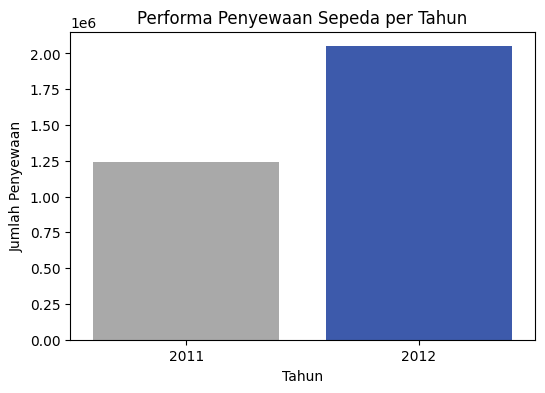

In [77]:
# Jumlah penyewaan pertahun
rentals_per_year = day_df.groupby("year")["count"].sum().reset_index()

plt.figure(figsize=(6, 4))

custom_palette = ["#a9a9a9", "#2a52be"]

sns.barplot(
    x=rentals_per_year["year"],
    y=rentals_per_year["count"],
    palette=custom_palette
)

plt.xticks(ticks=[0, 1], labels=["2011", "2012"])
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.title("Performa Penyewaan Sepeda per Tahun")

plt.show()



### Pertanyaan 2: Bagaimana performa penyewaan sepeda per bulan selama tahun 2011 hingga 2012?

<ipython-input-84-60356c2fc22d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_month = day_df.groupby(["year", "month"])["count"].sum().reset_index()


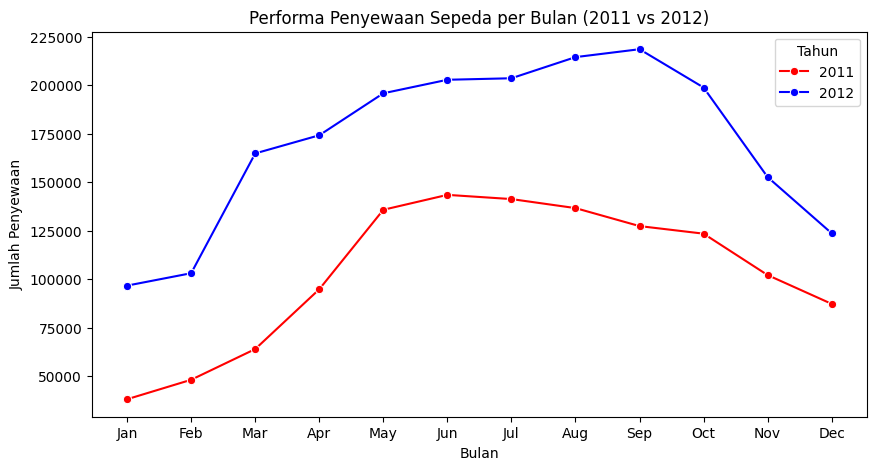

In [84]:
# Jumlah penyewaan per bulan dalam setiap tahun
rentals_per_month = day_df.groupby(["year", "month"])["count"].sum().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=rentals_per_month,
    x="month",
    y="count",
    hue="year",
    marker="o",
    palette={2011: "red", 2012: "blue"}
)

plt.xticks(
    ticks=range(12),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Performa Penyewaan Sepeda per Bulan (2011 vs 2012)")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Tahun",
    loc="upper right",
    frameon=True
)

plt.show()


### Pertanyaan 3: Bagaimana performa penyewaan sepeda perjam selama tahun 2011 hingga 2012?

<ipython-input-79-fa7975c822c1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_hour = hour_df.groupby(["year", "hour"])["count"].sum().reset_index()


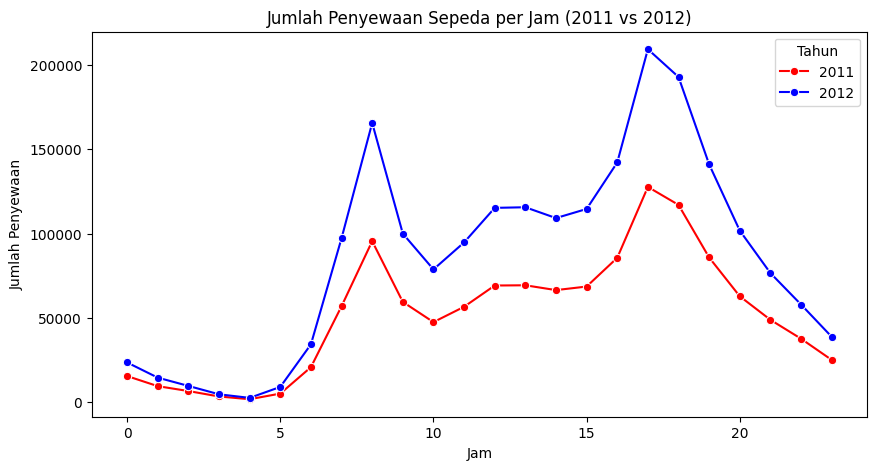

In [79]:
# Jumlah penyewaan per jam dalam setiap tahun
rentals_per_hour = hour_df.groupby(["year", "hour"])["count"].sum().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=rentals_per_hour,
    x="hour",
    y="count",
    hue="year",
    marker="o",
    palette={2011: "red", 2012: "blue"}
)

plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Jam (2011 vs 2012)")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Tahun",
    loc="upper right",
    frameon=True
)

plt.show()


### Pertanyaan 4: Pada musim apa penyewaan sepeda banyak terjadi?

<ipython-input-80-b831b6f7d57c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_per_season = day_df.groupby("season")["count"].sum().reset_index()
<ipython-input-80-b831b6f7d57c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="count", data=rentals_per_season, order=order, palette=colors)


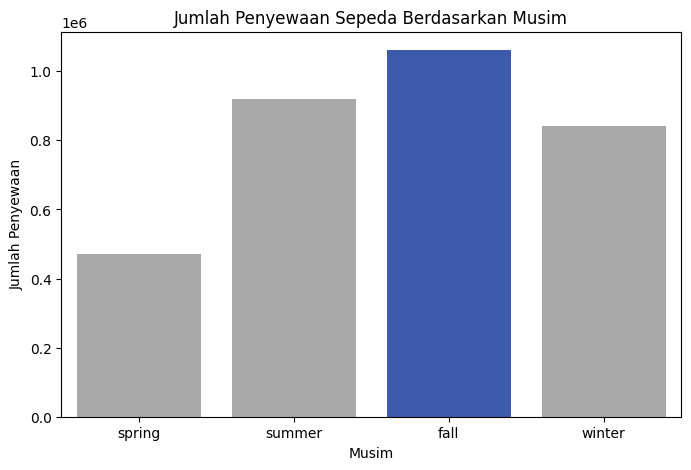

In [80]:
# Menghitung jumlah penyewaan berdasarkan musim
rentals_per_season = day_df.groupby("season")["count"].sum().reset_index()

order = ["spring", "summer", "fall", "winter"]
colors = ["#a9a9a9", "#a9a9a9", "#2a52be", "#a9a9a9"]

plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="count", data=rentals_per_season, order=order, palette=colors)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
- Jumlah penyewaan per tahun divisualisasikan menggunakan bar chart karena datanya bersifat kategori diskrit, yaitu tahun 2011 dan 2012, sehingga lebih mudah dibandingkan secara langsung.  

- Penyewaan per bulan menggunakan line chart karena menunjukkan tren perubahan dari waktu ke waktu, sehingga pola musiman dapat terlihat lebih jelas.  

- Penyewaan per jam juga menggunakan line chart karena data bersifat kontinu sepanjang hari, sehingga mempermudah analisis pola penyewaan pada jam tertentu.  

- Penyewaan per musim divisualisasikan menggunakan bar chart karena musim adalah kategori diskrit, sehingga lebih efektif untuk membandingkan jumlah penyewaan antar musim.

## Analisis Lanjutan (Opsional)

In [81]:
# Clustering berdasarkan waktu penggunaan

def categorize_time(hour):
    if 4 <= hour <= 10:
        return 'Pagi'
    elif 11 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Sore'
    else:
        return 'Malam'

hour_df['time_category'] = hour_df['hour'].apply(categorize_time)
hour_df.groupby('time_category')['count'].sum().reset_index()


,time_category,count
0,Malam,537368
1,Pagi,774688
2,Siang,879454
3,Sore,1101169


In [82]:
# Clustering berdasarkan musim
def categorize_season(season):
    if season == 'spring':
        return 'Sepi'
    elif season == 'fall':
        return 'Sedang'
    else:
        return 'Ramai'

day_df['season_category'] = day_df['season'].apply(categorize_season)
day_df.groupby('season_category')['count'].sum().reset_index()


,season_category,count
0,Ramai,1760202
1,Sedang,1061129
2,Sepi,471348


**Insight:**
- Waktu sore adalah periode dengan jumlah penyewaan tertinggi, sementara malam adalah yang terendah.
- Musim ramai memiliki penyewaan tertinggi, menandakan bahwa faktor musim berpengaruh signifikan terhadap tingkat penyewaan.


## Conclusion
1. Bagaimana performa penyewaan sepeda dari tahun 2011 hingga 2012?

      Conclusion: Jumlah penyewaan sepeda meningkat secara signifikan dari tahun 2011 ke 2012. Pada tahun 2011, total penyewaan sepeda tercatat sekitar 1,25 juta kali, sementara pada tahun 2012 angkanya melonjak hingga sekitar 2 juta kali, menunjukkan peningkatan sekitar 60%.
2. Bagaimana performa penyewaan sepeda perbulan selama tahun 2011 hingga 2012?
      Berdasarkan grafik penyewaan sepeda per bulan dari tahun 2011 hingga 2012, terlihat pola yang konsisten setiap tahunnya. Aktivitas penyewaan sepeda meningkat secara bertahap sejak awal tahun dan mencapai puncaknya pada pertengahan tahun, khususnya pada bulan Juni dan Juli. Bulan-bulan ini menunjukkan jumlah penyewaan tertinggi, menandakan bahwa pertengahan tahun menjadi periode dengan permintaan layanan penyewaan yang paling besar. Setelah puncak ini, jumlah penyewaan perlahan menurun pada bulan-bulan selanjutnya hingga akhir tahun, yaitu Desember.

      Selain itu, data juga memperlihatkan bahwa setiap bulan di tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan bulan yang sama di tahun 2011. Hal ini menunjukkan adanya peningkatan performa layanan secara keseluruhan di tahun 2012. Dengan demikian, tren penyewaan sepeda dari tahun 2011 ke 2012 tidak hanya meningkat secara total tetapi juga memperlihatkan performa yang lebih baik di setiap periode bulannya. Pola ini memberikan indikasi penting bahwa layanan penyewaan sepeda berhasil tumbuh secara konsisten, yang dapat dimanfaatkan untuk menyusun strategi pengembangan dan promosi di masa depan.
3. Bagaimana performa penyewaan sepeda perjam selama tahun 2011 hingga 2012?
      Berdasarkan grafik penyewaan sepeda per jam selama tahun 2011 hingga 2012, terlihat pola yang mirip pada kedua tahun. Aktivitas penyewaan sepeda memuncak pada pukul 8 pagi dan 5 sore, yang kemungkinan besar mencerminkan jam sibuk saat orang-orang menggunakan sepeda untuk perjalanan kerja atau aktivitas harian. Di luar jam sibuk tersebut, jumlah penyewaan cenderung rendah, terutama pada dini hari dan larut malam.

      Jika dibandingkan, jumlah penyewaan sepeda di tahun 2012 secara keseluruhan lebih tinggi dibandingkan tahun 2011 pada hampir semua jam. Peningkatan yang paling mencolok juga terjadi pada waktu-waktu puncak seperti pagi dan sore hari, dengan jumlah penyewaan di tahun 2012 jauh melampaui jumlah di tahun 2011. Hal ini mengindikasikan adanya pertumbuhan yang signifikan dalam penggunaan layanan penyewaan sepeda pada tahun 2012. Kesimpulannya, performa penyewaan sepeda per jam menunjukkan peningkatan yang konsisten di tahun 2012 dibandingkan 2011, dengan pola penggunaan yang tetap dipengaruhi oleh kebutuhan perjalanan di jam-jam sibuk.
4. Pada musim apa penyewaan sepeda banyak terjadi?
      Berdasarkan gambar yang menunjukkan jumlah penyewaan sepeda berdasarkan musim, dapat disimpulkan bahwa musim gugur (fall) adalah musim dengan jumlah penyewaan sepeda tertinggi. Hal ini terlihat dari tinggi batang pada musim gugur yang mengungguli musim-musim lainnya seperti musim panas (summer), musim dingin (winter), dan musim semi (spring). Dengan demikian, musim gugur merupakan periode paling populer untuk aktivitas penyewaan sepeda dibandingkan musim lainnya.

In [83]:
# Menyimpan dataset hasil cleaning
day_df.to_csv('day_clean.csv', index=False)
hour_df.to_csv('hour_clean.csv', index=False)